In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Food_Delivery_Times.csv')

In [3]:
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [4]:
df.shape

(1000, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1000 non-null   int64  
 1   Distance_km             1000 non-null   float64
 2   Weather                 970 non-null    object 
 3   Traffic_Level           970 non-null    object 
 4   Time_of_Day             970 non-null    object 
 5   Vehicle_Type            1000 non-null   object 
 6   Preparation_Time_min    1000 non-null   int64  
 7   Courier_Experience_yrs  970 non-null    float64
 8   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 70.4+ KB


In [6]:
df.describe(include ='all')

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
count,1000.000000,1000.000000,970,970,970,1000,1000.000000,970.000000,1000.000000
unique,NaN,NaN,5,3,4,3,NaN,NaN,NaN
top,NaN,NaN,Clear,Medium,Morning,Bike,NaN,NaN,NaN
freq,NaN,NaN,470,390,308,503,NaN,NaN,NaN
mean,500.500000,10.059970,NaN,NaN,NaN,NaN,16.982000,4.579381,56.732000
std,288.819436,5.696656,NaN,NaN,NaN,NaN,7.204553,2.914394,22.070915
min,1.000000,0.590000,NaN,NaN,NaN,NaN,5.000000,0.000000,8.000000
25%,250.750000,5.105000,NaN,NaN,NaN,NaN,11.000000,2.000000,41.000000
50%,500.500000,10.190000,NaN,NaN,NaN,NaN,17.000000,5.000000,55.500000
75%,750.250000,15.017500,NaN,NaN,NaN,NaN,23.000000,7.000000,71.000000


In [7]:
df['Preparation_Time_min'].value_counts(ascending=False)

,count
Preparation_Time_min,
14,52
16,49
25,48
10,47
9,46
11,46
17,45
6,44
22,42


In [8]:
df.isnull().sum()

,0
Order_ID,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


Missing Values Handling

In [9]:
df['Weather'] = df['Weather'].fillna(df['Weather'].mode()[0])
df['Traffic_Level'] = df['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df['Time_of_Day'] = df['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df['Courier_Experience_yrs'] = df['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [10]:
category = ['Weather',	'Traffic_Level',	'Time_of_Day',	'Vehicle_Type'	,'Preparation_Time_min',	'Courier_Experience_yrs']

for column in category:
  print(df[column].value_counts(ascending = False))

Weather
Clear    500
Rainy    204
Foggy    103
Snowy     97
Windy     96
Name: count, dtype: int64
Traffic_Level
Medium    420
Low       383
High      197
Name: count, dtype: int64
Time_of_Day
Morning      338
Evening      293
Afternoon    284
Night         85
Name: count, dtype: int64
Vehicle_Type
Bike       503
Scooter    302
Car        195
Name: count, dtype: int64
Preparation_Time_min
14    52
16    49
25    48
10    47
9     46
11    46
17    45
6     44
22    42
8     42
27    40
28    40
26    40
29    39
21    39
20    39
12    38
23    38
7     37
24    37
19    35
13    30
5     30
15    29
18    28
Name: count, dtype: int64
Courier_Experience_yrs
5.0    120
6.0    109
9.0    108
1.0    107
8.0    101
2.0     99
4.0     94
7.0     91
0.0     91
3.0     80
Name: count, dtype: int64


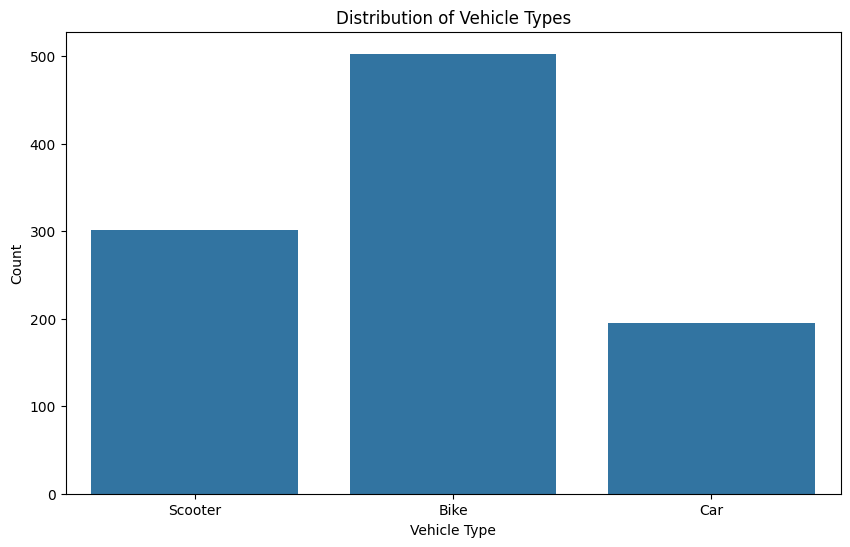

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Vehicle_Type', data=df)
plt.title('Distribution of Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

The chart reveals the distribution of delivery vehicles, with 'Bike' being the most common, followed by 'Scooter' and then 'Car'. This could suggest that bikes are preferred for deliveries, potentially due to their maneuverability in traffic or lower operating costs.

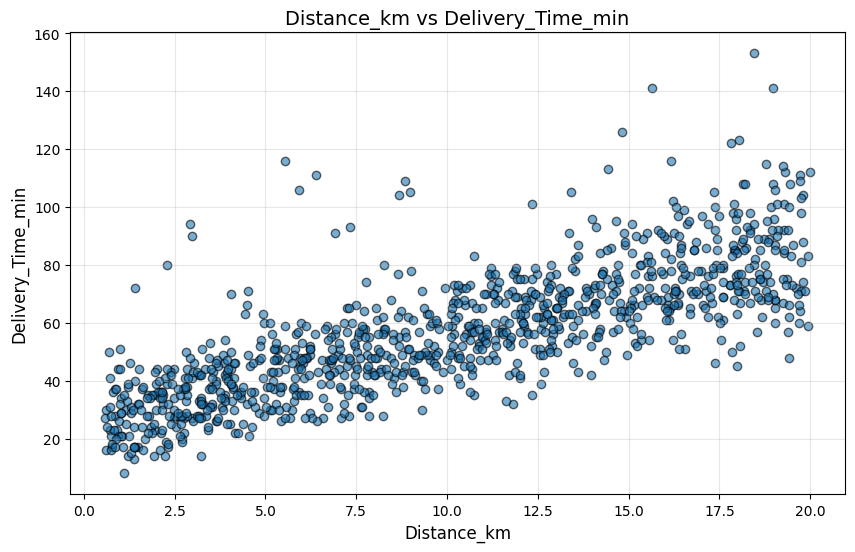

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Distance_km"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Distance_km vs Delivery_Time_min", fontsize=14)
plt.xlabel("Distance_km", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

The scatter plot shows a positive correlation between distance and delivery time, implying that longer distances generally result in longer delivery times. This is intuitive, as greater distances require more travel time. There's also a degree of variability, indicating that other factors besides distance affect delivery time.

In [13]:
fig = px.histogram(df, x= 'Preparation_Time_min', nbins= 100)
fig.show()

The histogram illustrates the frequency of different preparation times. The distribution appears to be slightly right-skewed, indicating that most orders have shorter preparation times, while a smaller number of orders take longer to prepare. Understanding this distribution can help in managing customer expectations and optimizing delivery processes.

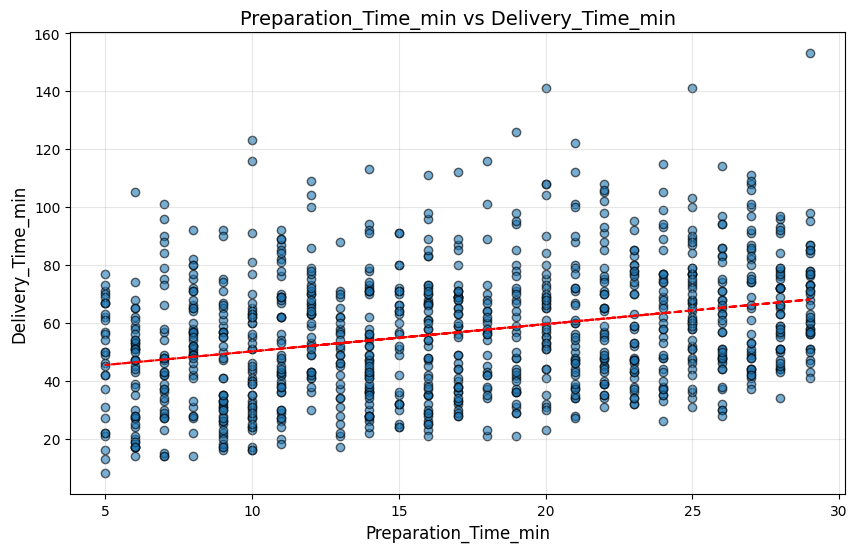

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Preparation_Time_min"], df["Delivery_Time_min"], alpha=0.6, edgecolor='k')
plt.title("Preparation_Time_min vs Delivery_Time_min", fontsize=14)
plt.xlabel("Preparation_Time_min", fontsize=12)
plt.ylabel("Delivery_Time_min", fontsize=12)
plt.grid(alpha=0.3)

# Calculate trendline
z = np.polyfit(df["Preparation_Time_min"], df["Delivery_Time_min"], 1)
p = np.poly1d(z)

# Add trendline to plot
plt.plot(df["Preparation_Time_min"], p(df["Preparation_Time_min"]), "r--")

plt.show()

In [15]:
fig3 = px.scatter(df, x= 'Preparation_Time_min', y= 'Delivery_Time_min', color_discrete_sequence=['Black'],trendline='ols')
fig3.show()

The scatter plot demonstrates a positive correlation between preparation time and delivery time, suggesting that orders with longer preparation times tend to have longer delivery times. This is expected, as the total delivery time includes the time taken for both preparation and travel.

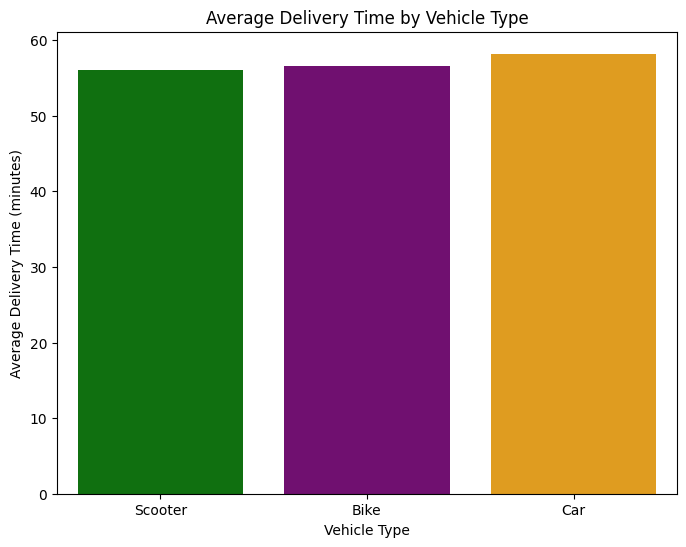

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Vehicle_Type', y='Delivery_Time_min', data=df, errorbar=None, hue='Vehicle_Type', palette = {'Scooter': "green", 'Bike': "purple", 'Car': 'orange'})
plt.title("Average Delivery Time by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Average Delivery Time (minutes)")
plt.show()

The barplot highlights the differences in average delivery times across vehicle types. It might show that bikes and scooters have similar delivery times on average, possibly due to their agility in navigating traffic. Cars may have slightly longer delivery times. This analysis can be valuable in understanding the efficiency of different vehicle types for delivery operations.

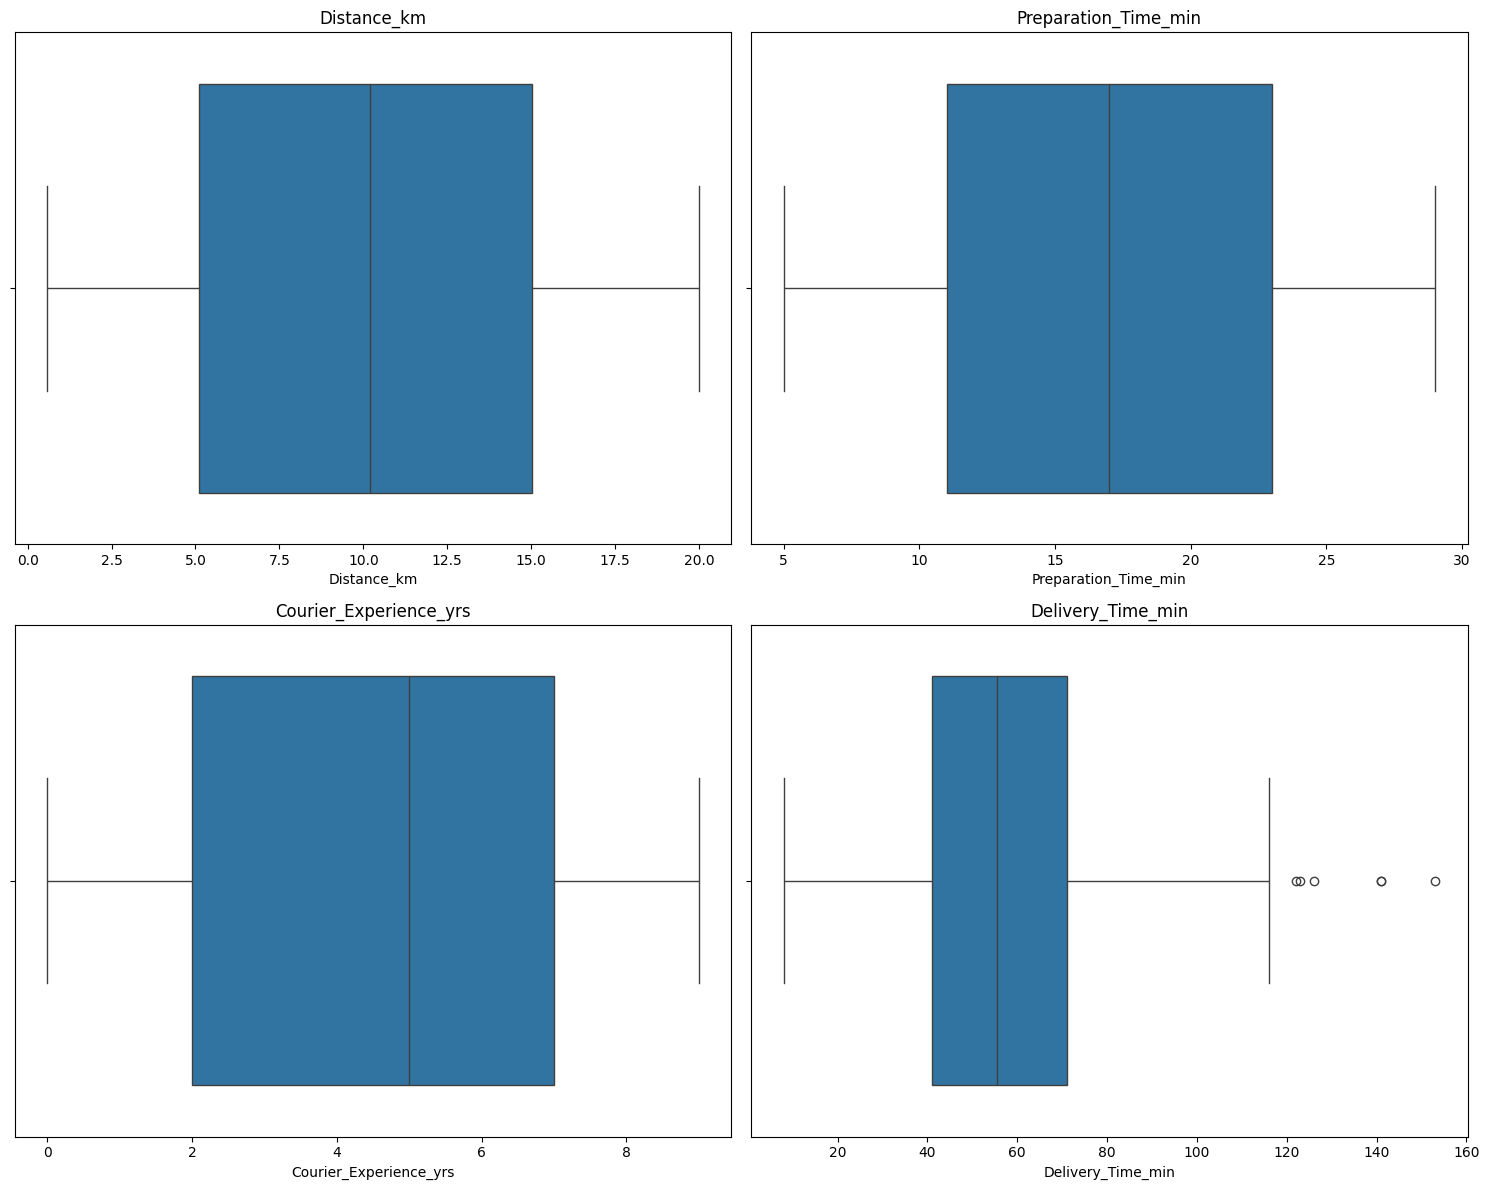

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Distance_km'], ax=axes[0, 0])
axes[0, 0].set_title('Distance_km')

sns.boxplot(x=df['Preparation_Time_min'], ax=axes[0, 1])
axes[0, 1].set_title('Preparation_Time_min')

sns.boxplot(x=df['Courier_Experience_yrs'], ax=axes[1, 0])
axes[1, 0].set_title('Courier_Experience_yrs')

sns.boxplot(x=df['Delivery_Time_min'], ax=axes[1, 1])
axes[1, 1].set_title('Delivery_Time_min')

plt.tight_layout()
plt.show()

In [18]:
fig = px.box(df, x= 'Preparation_Time_min', y= 'Delivery_Time_min', color_discrete_sequence=['Black'], width=1200, template='simple_white')
fig.show()

In [19]:
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Food_Delivery_Times.csv')

In [20]:
null_locations = df1[df1.isnull().any(axis=1)]
pd.set_option('display.max_rows', None)
null_locations

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
6,627,9.52,Clear,Low,NaN,Bike,12,1.0,49
14,939,2.80,Clear,High,Morning,Scooter,10,NaN,33
24,211,11.20,Clear,Medium,Morning,Bike,23,NaN,73
42,313,0.99,NaN,Medium,Evening,Bike,15,NaN,32
71,494,4.17,NaN,Low,Evening,Scooter,5,1.0,22
85,549,10.65,Clear,NaN,Afternoon,Scooter,23,8.0,58
90,383,12.76,Windy,High,Morning,Scooter,27,NaN,74
95,437,1.92,Clear,Low,NaN,Bike,8,7.0,14
110,529,1.60,Foggy,Low,Night,Scooter,24,NaN,37
113,817,12.03,Clear,Medium,NaN,Car,20,5.0,65


In [21]:
df1['Weather'] = df1['Weather'].fillna(df['Weather'].mode()[0])
df1['Traffic_Level'] = df1['Traffic_Level'].fillna(df['Traffic_Level'].mode()[0])
df1['Time_of_Day'] = df1['Time_of_Day'].fillna(df['Time_of_Day'].mode()[0])

df1['Courier_Experience_yrs'] = df1['Courier_Experience_yrs'].fillna(df['Courier_Experience_yrs'].median())

In [22]:
fig4 = px.histogram(df1, x= 'Delivery_Time_min', color_discrete_sequence=['Black'], marginal= 'box', height = 600)
fig4.show()

In [23]:
# calculate IQR for column Height
Q1 = df['Delivery_Time_min'].quantile(0.25)
Q3 = df['Delivery_Time_min'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['Delivery_Time_min'] < Q1 - threshold * IQR) | (df['Delivery_Time_min'] > Q3 + threshold * IQR)]

In [24]:
outliers

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
29,948,18.05,Clear,Medium,Evening,Scooter,10,7.0,123
127,446,18.97,Clear,Low,Evening,Car,25,4.0,141
379,814,18.46,Clear,Medium,Morning,Scooter,29,1.0,153
452,394,15.64,Rainy,Low,Morning,Bike,20,4.0,141
784,385,14.83,Rainy,Low,Morning,Car,19,4.0,126
924,428,17.81,Windy,High,Evening,Bike,21,4.0,122


In [25]:
df = df.drop(outliers.index)

In [26]:
fig4 = px.histogram(df, x= 'Delivery_Time_min', color_discrete_sequence=['Black'], marginal= 'box', height = 600)
fig4.show()

In [27]:
from sklearn.model_selection import train_test_split
X = df.drop('Delivery_Time_min', axis=1)
y = df['Delivery_Time_min']
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [28]:
x_train.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
913,566,12.00,Clear,Low,Evening,Car,25,0.0
930,565,7.34,Foggy,Medium,Afternoon,Bike,22,5.0
664,112,3.64,Clear,Low,Morning,Scooter,16,3.0
768,843,3.97,Clear,High,Afternoon,Bike,19,8.0
915,2,19.04,Rainy,Low,Evening,Car,12,6.0


In [29]:
y_train.head()

,Delivery_Time_min
913,75
930,93
664,26
768,40
915,60


In [30]:
X_test

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs
925,455,2.67,Clear,Medium,Night,Car,17,6.0
529,94,11.44,Rainy,Medium,Evening,Car,20,2.0
571,125,4.94,Rainy,High,Evening,Scooter,28,4.0
660,153,3.33,Clear,Medium,Evening,Scooter,24,2.0
932,777,4.97,Rainy,Low,Evening,Bike,17,9.0
432,355,1.88,Clear,Medium,Morning,Scooter,24,7.0
874,839,11.82,Windy,Medium,Night,Bike,24,7.0
715,187,16.44,Rainy,High,Afternoon,Bike,12,5.0
176,255,3.81,Rainy,High,Afternoon,Bike,5,6.0
608,617,1.69,Windy,Medium,Afternoon,Car,11,7.0


In [31]:
x_train.to_csv('X_train.csv')
y_train.to_csv('y_train.csv')
X_test.to_csv('X_test.csv')
y_test.to_csv('y_test.csv')

Feature Engimeering


In [64]:
x_train = pd.read_csv('/content/X_train.csv')
y_train = pd.read_csv('/content/y_train.csv')
x_test = pd.read_csv('/content/X_test.csv')
y_test = pd.read_csv('/content/y_test.csv')

In [33]:
y_train

,Unnamed: 0,Delivery_Time_min
0,913,75
1,930,93
2,664,26
3,768,40
4,915,60
5,246,32
6,301,30
7,384,71
8,298,100
9,50,56


In [73]:
data_encoded['Traffic_Level']= data_encoded['Traffic_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [74]:
data_encoded['Time_of_Day']= data_encoded['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})

In [92]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Weather','Vehicle_Type']
encoder = OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(x_train[categorical_cols])
encoded_df=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_cols))
data_encoded=pd.concat([x_train.drop(columns=categorical_cols),encoded_df],axis=1)
data_encoded.head()

,Unnamed: 0,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,913,566,12.00,Low,Evening,25,0.0,0.480000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,930,565,7.34,Medium,Afternoon,22,5.0,0.333636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,664,112,3.64,Low,Morning,16,3.0,0.227500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,768,843,3.97,High,Afternoon,19,8.0,0.208947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,915,2,19.04,Low,Evening,12,6.0,1.586667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [35]:
data_encoded.shape

(795, 15)

In [93]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['Distance_km', 'Courier_Experience_yrs', 'Preparation_Time_min']

scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])
data_encoded.head()

,Unnamed: 0,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,913,566,0.315234,Low,Evening,1.101566,-1.599293,0.480000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,930,565,-0.512357,Medium,Afternoon,0.687567,0.133383,0.333636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,664,112,-1.169457,Low,Morning,-0.140430,-0.559687,0.227500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,768,843,-1.110851,High,Afternoon,0.273569,1.172989,0.208947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,915,2,1.565500,Low,Evening,-0.692428,0.479919,1.586667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [94]:
# X test

from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['Weather','Vehicle_Type']
encoder = OneHotEncoder(sparse_output=False)
encoded_data=encoder.fit_transform(x_test[categorical_cols])
encoded_df_test=pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(categorical_cols))
data_encoded_test=pd.concat([x_test.drop(columns=categorical_cols),encoded_df_test],axis=1)
data_encoded_test.head()


numerical_cols = ['Distance_km', 'Courier_Experience_yrs', 'Preparation_Time_min']

scaler = StandardScaler()
data_encoded_test[numerical_cols] = scaler.fit_transform(data_encoded_test[numerical_cols])
data_encoded_test.head()

data_encoded_test['Time_of_Day']= data_encoded_test['Time_of_Day'].map({'Morning': 0, 'Afternoon': 1, 'Evening': 2, 'Night': 3})
data_encoded_test['Traffic_Level']= data_encoded_test['Traffic_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

data_encoded_test.head()

,Unnamed: 0,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,925,455,-1.121508,1,3,0.038654,0.523834,0.157059,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,529,94,0.388723,1,2,0.465992,-0.889630,0.572000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,571,125,-0.730604,2,2,1.605562,-0.182898,0.176429,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,660,153,-1.007853,1,2,1.035777,-0.889630,0.138750,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,932,777,-0.725438,0,2,0.038654,1.583932,0.292353,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [42]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
transformers=[
    ('numarical',StandardScaler(),['Distance_km','Preparation_Time_min','Speed_[km/m]']),
    ('Categorical', OneHotEncoder(),['Weather', 'Traffic_Level', 'Vehicle_Type'])
             ],
    remainder='passthrough'
)

In [39]:
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('numarical', StandardScaler(),
                                 ['Distance_km', 'Preparation_Time_min',
                                  'Speed_[km/m]']),
                                ('Categorical', OneHotEncoder(),
                                 ['Weather', 'Traffic_Level', 'Vehicle_Type'])])

In [65]:
x_test['Speed_[km/m]'] = x_test['Distance_km'] / x_test['Preparation_Time_min']

In [66]:
x_train['Speed_[km/m]'] = x_train['Distance_km'] / x_train['Preparation_Time_min']

In [67]:
transformer.fit(x_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1651: FutureWarning:


The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).




ColumnTransformer(remainder='passthrough',
                  transformers=[('numarical', StandardScaler(),
                                 ['Distance_km', 'Preparation_Time_min',
                                  'Speed_[km/m]']),
                                ('Categorical', OneHotEncoder(),
                                 ['Weather', 'Traffic_Level', 'Vehicle_Type'])])

In [68]:
new_x_test= transformer.transform(x_test)

In [60]:
def int_convertor(column,df):
  try:
    df[column] = df[column].astype('int64')
  except Exception as e:
    print(e)
encoded_catagory = ['Unnamed: 0', 'Order_ID', 'Distance_km', 'Traffic_Level', 'Time_of_Day',
       'Preparation_Time_min', 'Courier_Experience_yrs', 'Weather_Clear',
       'Weather_Foggy', 'Weather_Rainy', 'Weather_Snowy', 'Weather_Windy',
       'Vehicle_Type_Bike', 'Vehicle_Type_Car', 'Vehicle_Type_Scooter']
for column in encoded_catagory:
  int_convertor(column, data_encoded)

invalid literal for int() with base 10: 'Low'
invalid literal for int() with base 10: 'Evening'


In [76]:
data_encoded.head()

,Unnamed: 0,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
0,913,566,12.00,0,2,25,0.0,0.480000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,930,565,7.34,1,1,22,5.0,0.333636,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,664,112,3.64,0,0,16,3.0,0.227500,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,768,843,3.97,2,1,19,8.0,0.208947,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,915,2,19.04,0,2,12,6.0,1.586667,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [75]:
data_encoded.corr()

,Unnamed: 0,Order_ID,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Weather_Clear,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Bike,Vehicle_Type_Car,Vehicle_Type_Scooter
Unnamed: 0,1.000000,-0.001111,0.044088,0.005484,-0.064230,0.003444,0.030626,0.046929,-0.006804,0.040755,-0.030162,0.018598,-0.008077,0.013895,0.040141,-0.050135
Order_ID,-0.001111,1.000000,-0.026624,-0.001223,0.011595,-0.053951,-0.000882,0.014993,0.021377,-0.023170,0.005957,0.024155,-0.046327,0.015721,0.052483,-0.062866
Distance_km,0.044088,-0.026624,1.000000,0.013344,-0.034340,-0.042191,-0.012900,0.651243,-0.036145,-0.021065,0.023056,0.048772,0.001629,-0.013917,0.013560,0.003477
Traffic_Level,0.005484,-0.001223,0.013344,1.000000,0.026629,-0.025349,0.033071,0.012367,-0.032182,-0.012075,-0.000011,-0.000578,0.068917,0.012763,-0.057597,0.036070
Time_of_Day,-0.064230,0.011595,-0.034340,0.026629,1.000000,0.036392,0.028020,-0.023510,0.009190,0.039877,0.014570,0.009989,-0.088137,0.084726,-0.089863,-0.014815
Preparation_Time_min,0.003444,-0.053951,-0.042191,-0.025349,0.036392,1.000000,-0.048761,-0.620964,0.011088,-0.019854,-0.010295,0.019382,-0.004379,-0.014636,-0.010835,0.025473
Courier_Experience_yrs,0.030626,-0.000882,-0.012900,0.033071,0.028020,-0.048761,1.000000,0.011109,-0.047647,-0.056809,0.073723,0.015638,0.022790,-0.004995,-0.009176,0.013455
Speed_[km/m],0.046929,0.014993,0.651243,0.012367,-0.023510,-0.620964,0.011109,1.000000,-0.030739,0.004724,0.018355,0.012366,0.009873,-0.009889,0.002254,0.008888
Weather_Clear,-0.006804,0.021377,-0.036145,-0.032182,0.009190,0.011088,-0.047647,-0.030739,1.000000,-0.337455,-0.508385,-0.337455,-0.320787,-0.014029,-0.064661,0.071596
Weather_Foggy,0.040755,-0.023170,-0.021065,-0.012075,0.039877,-0.019854,-0.056809,0.004724,-0.337455,1.000000,-0.168562,-0.111888,-0.106362,0.001210,-0.006306,0.004154


In [95]:
new_df = pd.concat([data_encoded[['Distance_km', 'Preparation_Time_min','Courier_Experience_yrs','Speed_[km/m]']],y_train.reset_index(drop=True)], axis = 1)

In [85]:
new_df.corr().style.background_gradient(cmap='BrBG_r')

,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Speed_[km/m],Unnamed: 0,Delivery_Time_min
Distance_km,1.000000,-0.042191,-0.012900,0.651243,0.044088,0.772521
Preparation_Time_min,-0.042191,1.000000,-0.048761,-0.620964,0.003444,0.289870
Courier_Experience_yrs,-0.012900,-0.048761,1.000000,0.011109,0.030626,-0.098493
Speed_[km/m],0.651243,-0.620964,0.011109,1.000000,0.046929,0.301005
Unnamed: 0,0.044088,0.003444,0.030626,0.046929,1.000000,0.042350
Delivery_Time_min,0.772521,0.289870,-0.098493,0.301005,0.042350,1.000000
